In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
# import csv and create initial dataframe
df = pd.read_csv('kickstarter_data_full.csv', index_col = 0)
df.head()

c:\Users\sakib\anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3257: DtypeWarning: Columns (29,30,31,32) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,photo,name,blurb,goal,pledged,state,slug,disable_communication,country,...,launch_to_deadline,launch_to_state_change,create_to_launch_days,launch_to_deadline_days,launch_to_state_change_days,SuccessfulBool,USorGB,TOPCOUNTRY,LaunchedTuesday,DeadlineWeekend
0,1454391034,"{""small"":""https://ksr-ugc.imgix.net/assets/011...",Auntie Di's Music Time Sign ASL for Hearing an...,MTS ASL Curriculum Workbook is a reproducible ...,1500.0,0.0,failed,auntie-dis-music-time-sign-asl-for-hearing-and...,False,US,...,36 days 20:47:24.000000000,36 days 20:47:24.000000000,17,36,36,0,1,1,0,0
1,1655206086,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",Jump Start Kindergarten Toolkit,"This kit teaches how to print, correct an ugly...",500.0,0.0,failed,jump-start-kindergarten-toolkit,False,US,...,60 days 00:00:00.000000000,60 days 00:00:02.000000000,10,60,60,0,1,1,0,0
2,311581827,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",Ojukwu Balewa Awolowo (O.B.A.) Public Library ...,"Establishing a free, world-class, public libra...",100000.0,120.0,failed,ojukwu-balewa-awolowo-oba-public-library-of-ni...,False,US,...,60 days 00:00:00.000000000,60 days 00:00:01.000000000,1,60,60,0,1,1,0,0
3,859724515,"{""small"":""https://ksr-ugc.imgix.net/assets/011...","MASTIZE - [mas-TAHYZ, MAS-tahyz] - to spread",Goal: Introducing a new word into the English ...,5000.0,0.0,failed,mastize-mas-tahyz-mas-tahyz-to-spread,False,US,...,30 days 00:00:00.000000000,30 days 00:00:00.000000000,0,30,30,0,1,1,0,0
4,1613604977,"{""small"":""https://ksr-ugc.imgix.net/assets/012...","Synopse der EU-DSGVO - Artikel, Erwägungsgründ...",Zu den Artikeln der DSGVO sind die korrespondi...,3222.0,356.0,failed,synopse-der-eu-dsgvo-artikel-erwagungsgrunde-bdsg,False,DE,...,32 days 06:02:33.000000000,32 days 06:02:33.000000000,0,32,32,0,0,0,0,0


In [3]:
# Cleans data to show ~95% of columns are not null (63 out of 67 columns)
clean_df = df.dropna(thresh=63)

#Summary of cleaned data 
print(f"The original dataset had {len(df)} rows of data.  The cleaned dataset has {len(clean_df)} rows of data.")

The original dataset had 20632 rows of data.  The cleaned dataset has 18696 rows of data.


In [4]:
# remove superfluous columns
clean_df = clean_df.drop(["photo","blurb", "pledged", "slug", "disable_communication", "currency_symbol",
                          "currency_trailing_code", "deadline", "state_changed_at", "created_at",
                          "launched_at", "static_usd_rate", "creator", "location", "profile",
                          "urls", "source_url", "friends", "is_starred", "is_backing", "permissions",
                          "name_len","blurb_len" ,"create_to_launch", "launch_to_deadline", "launch_to_state_change", 
                          "USorGB", "TOPCOUNTRY", "LaunchedTuesday"], axis=1)

clean_df.head()

,id,name,goal,state,country,currency,staff_pick,backers_count,usd_pledged,category,...,created_at_hr,launched_at_month,launched_at_day,launched_at_yr,launched_at_hr,create_to_launch_days,launch_to_deadline_days,launch_to_state_change_days,SuccessfulBool,DeadlineWeekend
0,1454391034,Auntie Di's Music Time Sign ASL for Hearing an...,1500.0,failed,US,USD,False,0,0.000000,Academic,...,22,12,17,2014,13,17,36,36,0,0
1,1655206086,Jump Start Kindergarten Toolkit,500.0,failed,US,USD,False,0,0.000000,Academic,...,9,3,2,2015,16,10,60,60,0,0
2,311581827,Ojukwu Balewa Awolowo (O.B.A.) Public Library ...,100000.0,failed,US,USD,False,5,120.000000,Academic,...,0,1,25,2015,8,1,60,60,0,0
3,859724515,"MASTIZE - [mas-TAHYZ, MAS-tahyz] - to spread",5000.0,failed,US,USD,False,0,0.000000,Academic,...,22,9,6,2014,0,0,30,30,0,0
4,1613604977,"Synopse der EU-DSGVO - Artikel, Erwägungsgründ...",3222.0,failed,DE,EUR,False,17,396.802395,Academic,...,14,5,26,2016,5,0,32,32,0,0


In [5]:
# examine datatypes
print(clean_df.dtypes)

id                               int64
name                            object
goal                           float64
state                           object
country                         object
currency                        object
staff_pick                        bool
backers_count                    int64
usd_pledged                    float64
category                        object
spotlight                         bool
name_len_clean                 float64
blurb_len_clean                float64
deadline_weekday                object
state_changed_at_weekday        object
created_at_weekday              object
launched_at_weekday             object
deadline_month                   int64
deadline_day                     int64
deadline_yr                      int64
deadline_hr                      int64
state_changed_at_month           int64
state_changed_at_day             int64
state_changed_at_yr              int64
state_changed_at_hr              int64
created_at_month         

In [6]:
# update to relevant datatypes
clean_df = clean_df.astype({"id": object, "SuccessfulBool": bool, "DeadlineWeekend": bool})
print(clean_df.dtypes)

id                              object
name                            object
goal                           float64
state                           object
country                         object
currency                        object
staff_pick                        bool
backers_count                    int64
usd_pledged                    float64
category                        object
spotlight                         bool
name_len_clean                 float64
blurb_len_clean                float64
deadline_weekday                object
state_changed_at_weekday        object
created_at_weekday              object
launched_at_weekday             object
deadline_month                   int64
deadline_day                     int64
deadline_yr                      int64
deadline_hr                      int64
state_changed_at_month           int64
state_changed_at_day             int64
state_changed_at_yr              int64
state_changed_at_hr              int64
created_at_month         

In [7]:
# create list of columns for the correlation matrix
corr_input_col = ['SuccessfulBool', "goal", 'backers_count', 'usd_pledged', 'name_len_clean', 'blurb_len_clean', 'deadline_month',
                  'deadline_day', 'deadline_yr', 'deadline_hr', 'state_changed_at_month', 'state_changed_at_day',
                  'state_changed_at_yr', 'state_changed_at_hr', 'created_at_month', 'created_at_day', 'created_at_yr',
                  'created_at_hr', 'launched_at_month', 'launched_at_day', 'launched_at_yr', 'launched_at_hr',
                   'create_to_launch_days','launch_to_deadline_days', 'launch_to_state_change_days']

corr_df = clean_df[corr_input_col]

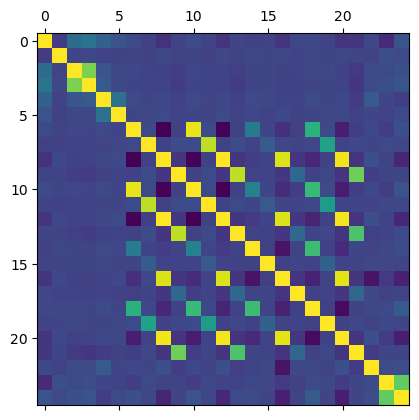

In [8]:
# correlation matrix heatmap
correlation_matrix = corr_df.corr()

plt.matshow(correlation_matrix)
plt.show()



In [9]:
# correlation matrix printout for specific analysis
print(correlation_matrix)

                             SuccessfulBool      goal  backers_count  \
SuccessfulBool                     1.000000 -0.038640       0.183405   
goal                              -0.038640  1.000000       0.003084   
backers_count                      0.183405  0.003084       1.000000   
usd_pledged                        0.224978  0.011186       0.749400   
name_len_clean                     0.130270 -0.009178       0.070406   
blurb_len_clean                    0.061038 -0.013313       0.009170   
deadline_month                     0.021901 -0.003279       0.004332   
deadline_day                      -0.013174 -0.020882      -0.008973   
deadline_yr                       -0.075615  0.009075      -0.011804   
deadline_hr                       -0.005951 -0.002055      -0.028166   
state_changed_at_month             0.025523 -0.000659       0.004171   
state_changed_at_day              -0.009366 -0.015596      -0.008564   
state_changed_at_yr               -0.071820  0.007936      -0.01

In [10]:
clean_df.head()

,id,name,goal,state,country,currency,staff_pick,backers_count,usd_pledged,category,...,created_at_hr,launched_at_month,launched_at_day,launched_at_yr,launched_at_hr,create_to_launch_days,launch_to_deadline_days,launch_to_state_change_days,SuccessfulBool,DeadlineWeekend
0,1454391034,Auntie Di's Music Time Sign ASL for Hearing an...,1500.0,failed,US,USD,False,0,0.000000,Academic,...,22,12,17,2014,13,17,36,36,False,False
1,1655206086,Jump Start Kindergarten Toolkit,500.0,failed,US,USD,False,0,0.000000,Academic,...,9,3,2,2015,16,10,60,60,False,False
2,311581827,Ojukwu Balewa Awolowo (O.B.A.) Public Library ...,100000.0,failed,US,USD,False,5,120.000000,Academic,...,0,1,25,2015,8,1,60,60,False,False
3,859724515,"MASTIZE - [mas-TAHYZ, MAS-tahyz] - to spread",5000.0,failed,US,USD,False,0,0.000000,Academic,...,22,9,6,2014,0,0,30,30,False,False
4,1613604977,"Synopse der EU-DSGVO - Artikel, Erwägungsgründ...",3222.0,failed,DE,EUR,False,17,396.802395,Academic,...,14,5,26,2016,5,0,32,32,False,False


In [11]:
print(clean_df.columns.tolist())

['id', 'name', 'goal', 'state', 'country', 'currency', 'staff_pick', 'backers_count', 'usd_pledged', 'category', 'spotlight', 'name_len_clean', 'blurb_len_clean', 'deadline_weekday', 'state_changed_at_weekday', 'created_at_weekday', 'launched_at_weekday', 'deadline_month', 'deadline_day', 'deadline_yr', 'deadline_hr', 'state_changed_at_month', 'state_changed_at_day', 'state_changed_at_yr', 'state_changed_at_hr', 'created_at_month', 'created_at_day', 'created_at_yr', 'created_at_hr', 'launched_at_month', 'launched_at_day', 'launched_at_yr', 'launched_at_hr', 'create_to_launch_days', 'launch_to_deadline_days', 'launch_to_state_change_days', 'SuccessfulBool', 'DeadlineWeekend']


In [12]:
# further refining the dataframe
#removing currency and country per outcome of original model results
#removing usd_pledged and backers_count
clean_df = clean_df.drop(['usd_pledged','backers_count','id','name','deadline_day','deadline_yr','deadline_hr','state_changed_at_day','state_changed_at_yr','state_changed_at_hr',
                          'created_at_month','created_at_day', 'country', 'currency','created_at_yr','created_at_hr','launched_at_day','launched_at_yr','launched_at_hr'], axis=1)

In [13]:
clean_df.head()

,goal,state,staff_pick,category,spotlight,name_len_clean,blurb_len_clean,deadline_weekday,state_changed_at_weekday,created_at_weekday,launched_at_weekday,deadline_month,state_changed_at_month,launched_at_month,create_to_launch_days,launch_to_deadline_days,launch_to_state_change_days,SuccessfulBool,DeadlineWeekend
0,1500.0,failed,False,Academic,False,9.0,16.0,Friday,Friday,Saturday,Wednesday,1,1,12,17,36,36,False,False
1,500.0,failed,False,Academic,False,4.0,15.0,Friday,Friday,Friday,Monday,5,5,3,10,60,60,False,False
2,100000.0,failed,False,Academic,False,8.0,10.0,Thursday,Thursday,Saturday,Sunday,3,3,1,1,60,60,False,False
3,5000.0,failed,False,Academic,False,6.0,13.0,Monday,Monday,Friday,Saturday,10,10,9,0,30,30,False,False
4,3222.0,failed,False,Academic,False,7.0,18.0,Monday,Monday,Wednesday,Thursday,6,6,5,0,32,32,False,False


In [14]:
# bucketing seasons
season_mapper = lambda x: 'Winter' if x in [12, 1, 2] else \
                          'Spring' if x in [3, 4, 5] else \
                          'Summer' if x in [6, 7, 8] else \
                          'Fall' if x in [9, 10, 11] else None

# apply the lambda function to the 'Month' column and assign the result to a new column 'Season'
clean_df['deadline_season'] = clean_df['deadline_month'].apply(season_mapper)
clean_df['launched_season'] = clean_df['launched_at_month'].apply(season_mapper)

# remove the months that were converted to seasons
clean_df = clean_df.drop(['deadline_month', 'launched_at_month'], axis=1)

# print the resulting dataframe
clean_df.head()


,goal,state,staff_pick,category,spotlight,name_len_clean,blurb_len_clean,deadline_weekday,state_changed_at_weekday,created_at_weekday,launched_at_weekday,state_changed_at_month,create_to_launch_days,launch_to_deadline_days,launch_to_state_change_days,SuccessfulBool,DeadlineWeekend,deadline_season,launched_season
0,1500.0,failed,False,Academic,False,9.0,16.0,Friday,Friday,Saturday,Wednesday,1,17,36,36,False,False,Winter,Winter
1,500.0,failed,False,Academic,False,4.0,15.0,Friday,Friday,Friday,Monday,5,10,60,60,False,False,Spring,Spring
2,100000.0,failed,False,Academic,False,8.0,10.0,Thursday,Thursday,Saturday,Sunday,3,1,60,60,False,False,Spring,Winter
3,5000.0,failed,False,Academic,False,6.0,13.0,Monday,Monday,Friday,Saturday,10,0,30,30,False,False,Fall,Fall
4,3222.0,failed,False,Academic,False,7.0,18.0,Monday,Monday,Wednesday,Thursday,6,0,32,32,False,False,Summer,Spring


In [15]:
# bucketing weekdays vs weekends
wd_we_mapper = lambda x: 'Weekend' if x in ["Saturday", "Sunday"] else \
                          'Weekday' if x in ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"] else None


clean_df['created_wd_we'] = clean_df['created_at_weekday'].apply(wd_we_mapper)
clean_df['launched_wd_we'] = clean_df['launched_at_weekday'].apply(wd_we_mapper)

clean_df = clean_df.drop(['created_at_weekday','launched_at_weekday'], axis=1)

clean_df.head()

,goal,state,staff_pick,category,spotlight,name_len_clean,blurb_len_clean,deadline_weekday,state_changed_at_weekday,state_changed_at_month,create_to_launch_days,launch_to_deadline_days,launch_to_state_change_days,SuccessfulBool,DeadlineWeekend,deadline_season,launched_season,created_wd_we,launched_wd_we
0,1500.0,failed,False,Academic,False,9.0,16.0,Friday,Friday,1,17,36,36,False,False,Winter,Winter,Weekend,Weekday
1,500.0,failed,False,Academic,False,4.0,15.0,Friday,Friday,5,10,60,60,False,False,Spring,Spring,Weekday,Weekday
2,100000.0,failed,False,Academic,False,8.0,10.0,Thursday,Thursday,3,1,60,60,False,False,Spring,Winter,Weekend,Weekend
3,5000.0,failed,False,Academic,False,6.0,13.0,Monday,Monday,10,0,30,30,False,False,Fall,Fall,Weekday,Weekend
4,3222.0,failed,False,Academic,False,7.0,18.0,Monday,Monday,6,0,32,32,False,False,Summer,Spring,Weekday,Weekday


In [16]:
clean_df.dtypes

goal                           float64
state                           object
staff_pick                        bool
category                        object
spotlight                         bool
name_len_clean                 float64
blurb_len_clean                float64
deadline_weekday                object
state_changed_at_weekday        object
state_changed_at_month           int64
create_to_launch_days            int64
launch_to_deadline_days          int64
launch_to_state_change_days      int64
SuccessfulBool                    bool
DeadlineWeekend                   bool
deadline_season                 object
launched_season                 object
created_wd_we                   object
launched_wd_we                  object
dtype: object

In [17]:
#removing country and currency from one hot encoding 
one_hot_df = pd.DataFrame(clean_df[['state', 
                                      'staff_pick', 
                                      'SuccessfulBool', 
                                      'spotlight',  
                                      'category', 
                                      'deadline_weekday', 
                                      'state_changed_at_month',
                                       'deadline_season', 
                                      'DeadlineWeekend',
                                      'state_changed_at_weekday',
                                      'launched_season', 
                                      'created_wd_we', 
                                      'launched_wd_we']])
one_hot_dummies = pd.get_dummies(one_hot_df)
one_hot_dummies.head()

,staff_pick,SuccessfulBool,spotlight,state_changed_at_month,DeadlineWeekend,state_canceled,state_failed,state_live,state_successful,state_suspended,...,state_changed_at_weekday_Tuesday,state_changed_at_weekday_Wednesday,launched_season_Fall,launched_season_Spring,launched_season_Summer,launched_season_Winter,created_wd_we_Weekday,created_wd_we_Weekend,launched_wd_we_Weekday,launched_wd_we_Weekend
0,False,False,False,1,False,0,1,0,0,0,...,0,0,0,0,0,1,0,1,1,0
1,False,False,False,5,False,0,1,0,0,0,...,0,0,0,1,0,0,1,0,1,0
2,False,False,False,3,False,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,1
3,False,False,False,10,False,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,1
4,False,False,False,6,False,0,1,0,0,0,...,0,0,0,1,0,0,1,0,1,0


In [18]:
#concatenate dummies_df with clean_df
#removing country and currency from concatenated df
final_df = pd.concat([clean_df, one_hot_dummies], axis = 1)
final_df.head()
final_df.drop([ 'state', 
                'staff_pick', 
                'SuccessfulBool', 
                'spotlight',  
                'category', 
                'deadline_weekday', 
                'state_changed_at_month',
                'deadline_season', 
                'DeadlineWeekend',
                'state_changed_at_weekday',
                'launched_season', 
                'created_wd_we', 
                'launched_wd_we',
                'state_failed',
                'state_canceled',
                'state_suspended'], axis=1, inplace = True)

final_df.head()

,goal,name_len_clean,blurb_len_clean,create_to_launch_days,launch_to_deadline_days,launch_to_state_change_days,state_live,state_successful,category_Academic,category_Apps,...,state_changed_at_weekday_Tuesday,state_changed_at_weekday_Wednesday,launched_season_Fall,launched_season_Spring,launched_season_Summer,launched_season_Winter,created_wd_we_Weekday,created_wd_we_Weekend,launched_wd_we_Weekday,launched_wd_we_Weekend
0,1500.0,9.0,16.0,17,36,36,0,0,1,0,...,0,0,0,0,0,1,0,1,1,0
1,500.0,4.0,15.0,10,60,60,0,0,1,0,...,0,0,0,1,0,0,1,0,1,0
2,100000.0,8.0,10.0,1,60,60,0,0,1,0,...,0,0,0,0,0,1,0,1,0,1
3,5000.0,6.0,13.0,0,30,30,0,0,1,0,...,0,0,1,0,0,0,1,0,0,1
4,3222.0,7.0,18.0,0,32,32,0,0,1,0,...,0,0,0,1,0,0,1,0,1,0


In [19]:
pd.options.display.max_rows = None
final_df.dtypes

goal                                  float64
name_len_clean                        float64
blurb_len_clean                       float64
create_to_launch_days                   int64
launch_to_deadline_days                 int64
launch_to_state_change_days             int64
state_live                              uint8
state_successful                        uint8
category_Academic                       uint8
category_Apps                           uint8
category_Blues                          uint8
category_Comedy                         uint8
category_Experimental                   uint8
category_Festivals                      uint8
category_Flight                         uint8
category_Gadgets                        uint8
category_Hardware                       uint8
category_Immersive                      uint8
category_Makerspaces                    uint8
category_Musical                        uint8
category_Places                         uint8
category_Plays                    

In [20]:
#develop and train random forest model
#define features set
X = final_df.copy()
X.drop("state_successful", axis =1, inplace = True)
y = final_df["state_successful"].values.reshape(-1, 1)

In [45]:
# Count the number of 0's and 1's
np.unique(y, return_counts= True)

(array([0, 1], dtype=uint8), array([13486,  5210], dtype=int64))

In [46]:
#Split data into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [47]:
#create StandardScaler instance and fit training data
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [38]:
# Use unravel() to convert to 1D array 
# y_train = y_train.unravel()
# y_test = y_test.unravel()

AttributeError: 'numpy.ndarray' object has no attribute 'unravel'

In [48]:
#create a random forest classifier
rf_model = RandomForestClassifier(n_estimators = 500, random_state = 1)



#fit the model
rf_model = rf_model.fit(X_train_scaled, y_train)

c:\Users\sakib\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


In [49]:
#making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [50]:
#model evaluation with confusion matrix
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [51]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,3100,281
Actual 1,724,569


Accuracy Score : 0.7849807445442876
Classification Report
              precision    recall  f1-score   support

           0       0.81      0.92      0.86      3381
           1       0.67      0.44      0.53      1293

    accuracy                           0.78      4674
   macro avg       0.74      0.68      0.70      4674
weighted avg       0.77      0.78      0.77      4674



In [28]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.15687534278114199, 'goal'),
 (0.11503006736885797, 'create_to_launch_days'),
 (0.08724469433553016, 'launch_to_state_change_days'),
 (0.07830103098871724, 'blurb_len_clean'),
 (0.0744681876833819, 'name_len_clean'),
 (0.06646370009894638, 'launch_to_deadline_days'),
 (0.04011942755180172, 'category_Web'),
 (0.01995398419109076, 'category_Software'),
 (0.018946190072480384, 'category_Plays'),
 (0.01300208961655304, 'deadline_season_Fall'),
 (0.012496421941797101, 'launched_season_Summer'),
 (0.012471709896915529, 'deadline_season_Summer'),
 (0.012324497297046835, 'launched_season_Fall'),
 (0.012244360932988231, 'launched_season_Spring'),
 (0.012096275875722451, 'deadline_season_Winter'),
 (0.011872463828801012, 'deadline_season_Spring'),
 (0.011700810075875052, 'category_Hardware'),
 (0.011539061405082474, 'created_wd_we_Weekday'),
 (0.011315593160296044, 'created_wd_we_Weekend'),
 (0.011206245434214732, 'category_Musical'),
 (0.011029494347016498, 'launched_season_Winter'),
 (0.010

<AxesSubplot:title={'center':'Top 20 Features Importances'}, ylabel='1'>

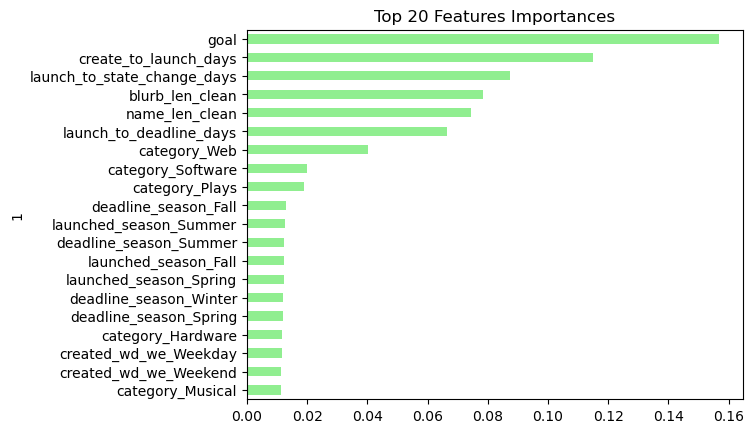

In [29]:
#visualize the importance of the features
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances').tail(20)
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Top 20 Features Importances', legend=False)


In [30]:
#feature importance based on permutation
from sklearn.inspection import permutation_importance

result = permutation_importance(rf_model, X_test, y_test, n_repeats=3, random_state=42, n_jobs=-1)

c:\Users\sakib\anaconda3\envs\PythonData\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [33]:
# Get the sorted indices of the permutation importance scores in descending order
sorted_idx = result.importances_mean.argsort()[::-1]

# Print the permutation importance scores for each feature in descending order
for idx in sorted_idx:
    print("{:<30} {:.3f}".format(X_test.columns[idx], result.importances_mean[idx]))

launched_wd_we_Weekend         0.000
category_Thrillers             0.000
category_Sound                 0.000
category_Software              0.000
category_Shorts                0.000
category_Robots                0.000
category_Restaurants           0.000
category_Plays                 0.000
category_Places                0.000
category_Musical               0.000
category_Makerspaces           0.000
category_Immersive             0.000
category_Hardware              0.000
category_Gadgets               0.000
category_Flight                0.000
category_Festivals             0.000
category_Experimental          0.000
category_Comedy                0.000
category_Blues                 0.000
category_Apps                  0.000
category_Academic              0.000
state_live                     0.000
launch_to_state_change_days    0.000
launch_to_deadline_days        0.000
create_to_launch_days          0.000
blurb_len_clean                0.000
name_len_clean                 0.000
c

In [46]:
print(result.importances_mean)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]


AttributeError: 'AxesSubplot' object has no attribute 'tail'

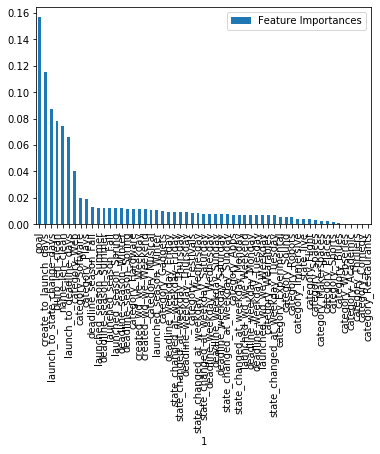

In [42]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()